#1. 회귀분석

In [1]:
# 필요한 패키지 설치

import pandas as pd # csv file
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성
from sklearn.model_selection import train_test_split # train/test set 생성
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 데이터 불러오기
df = pd.read_csv("/content/Boston_house.csv")

# 데이터 샘플 확인
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [5]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# 각 컬럼의 통계치 확인
df.describe()

# 결측치가 있거나 이상치가 있으면 보정 및 제거를 해주어야 한다.
# 이에 대한 내용은 앞의 데이터 전처리 및 파생변수 생성 부분에서 자세히 다루었기 때문에 생략

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


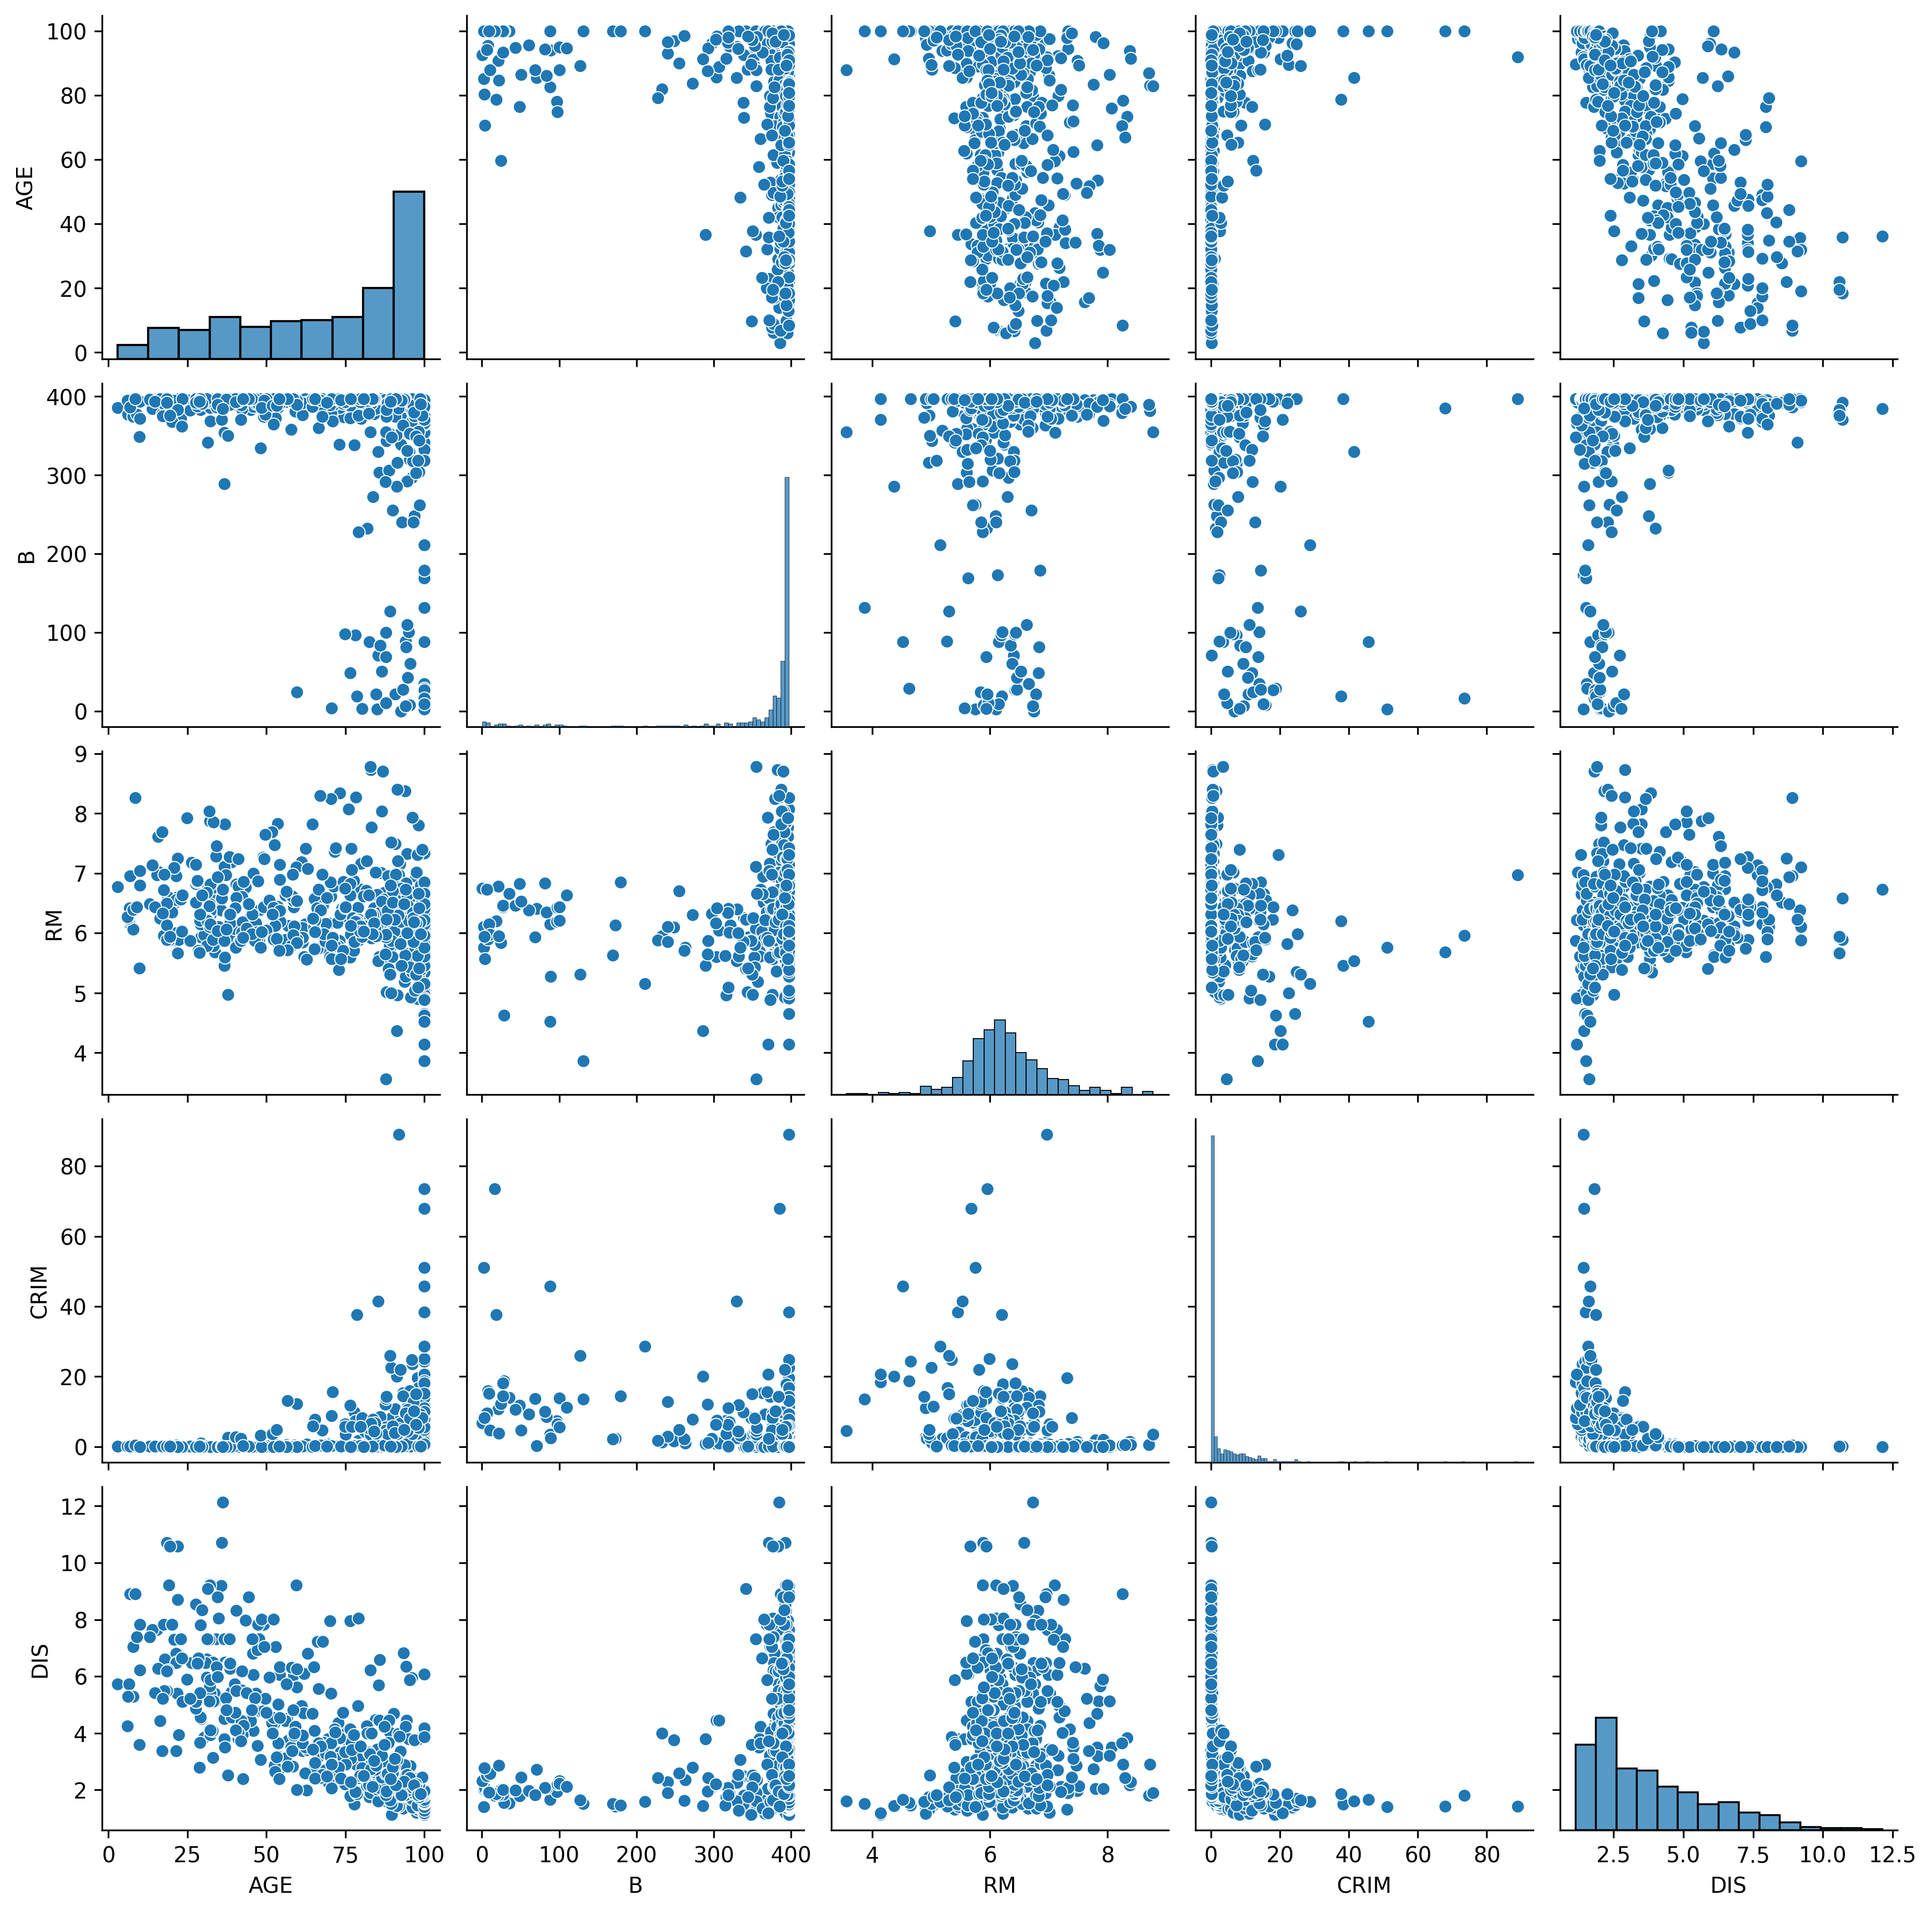

In [7]:
# 데이터 시각화 하여 분포 확인하기

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

sns.pairplot(df[["AGE", "B", "RM", "CRIM", "DIS"]])
plt.show()

In [8]:
# 변수 선택 및 컬럼명 붙여넣기 위한 컬럼 리스트 생성
df.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS', 'Target'],
      dtype='object')

In [9]:
# 독립변수와 종속변수 분리하여 생성
x = df[['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['Target']]

# 학습셋과 테스트셋 분리하여 생성(8:2)
# df_train, df_test = train_test_split(df, test_size = 0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [10]:
# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  404
test data 개수:  102


In [11]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train)
# 앞서 설치했던 sklearn의 LinearRegression을 학습데이터에 적용 해준다. 학습 데이터를 통해 price를 예측할 수 있는 회귀계수가 생성된다.
# fit_intercept 인수는 모형에 상수항을 넣을지 말지를 설정해 주는 명령어다. 기본 값은 True라서 상수항을 빼지 않을 거라면, 생략해도 된다.

LinearRegression()

In [12]:
# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

In [16]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

# R-square / accuracy -> 0.1 -> train - 74% / test 0 74%
# 보통 학습데이터와 검증데이터가 0.1정도 차이인 경우 사용?


학습셋 R-Square: 0.74
테스트셋 R-Square: 0.74


In [14]:
# 모델의 상수값 확인
print(mreg.intercept_)

# 모델의 회귀계수 확인
print(mreg.coef_)

# 그런데 LinearRegression 패키지는 R스퀘어 등 자세한 모델 결과치 확인이 어렵다. 수식을 코딩해주면 가능하지만, 여간 번거로운 일이 아니다.
# 그래서 자세한 모델 결과값을 확인하고 싶을 때는 OLS(Ordinary Least Squares) 패키지를 사용하면 편리하다.

[39.83259455]
[[ 6.99981867e-03  1.03471926e-02  3.40409819e+00 -1.11973916e-01
  -1.47597830e+00  3.48675468e-02 -5.94491231e-01 -1.72228481e+01
  -1.00417612e+00  3.27111053e-01  4.99327224e-02 -1.34174398e-02
   1.91529964e+00]]


In [17]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     84.28
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.54e-104
Time:                        05:22:03   Log-Likelihood:                -1198.3
No. Observations:                 404   AIC:                             2425.
Df Residuals:                     390   BIC:                             2481.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8326      5.758      6.918      0.000      28.512      51.153
AGE            0.0070      0.015      0.480      0.631      -0.022       0.036
B              0.0103      0.003      3.478      0.001       0.004       0.016
RM             3.4041      0.463      7.358      0.000       2.495       4.314
CRIM          -0.1120      0.035     -3.240      0.001      -0.180      -0.044
DIS           -1.4760      0.229     -6.450      0.000      -1.926      -1.026
INDUS          0.0349      0.069      0.505      0.614      -0.101       0.171
LSTAT         -0.5945      0.057    -10.491      0.000      -0.706      -0.483
NOX          -17.2228      4.356     -3.954      0.000     -25.787      -8.659
PTRATIO       -1.0042      0.148     -6.776      0.000      -1.296      -0.713
RAD            0.3271      0.076      4.331      0.000       0.179       0.476
ZN             0.0499      0.016      3.090      0.002       0.018       0.082
TAX           -0.0134      0.004     -3.103      0.002      -0.022      -0.005
CHAS           1.9153      1.040      1.841      0.066      -0.130       3.961
==============================================================================
Omnibus:                      145.647   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.881
Skew:                           1.525   Prob(JB):                    1.86e-139
Kurtosis:                       8.353   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
x_columns = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

In [19]:
## creating function to get model statistics
def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Mon, 10 Jul 2023   Prob (F-statistic):                        0.00
Time:                        05:34:21   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
x_columns.remove("INDUS")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              967.5
Date:                Mon, 10 Jul 2023   Prob (F-statistic):                        0.00
Time:                        05:34:46   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3072.
Df Residuals:                     494   BIC:                                      3122.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
x_columns.remove("NOX")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1056.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):                        0.00
Time:                        05:34:49   Log-Likelihood:                         -1524.2
No. Observations:                 506   AIC:                                      3070.
Df Residuals:                     495   BIC:                                      3117.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
x_columns.remove("AGE")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1162.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):                        0.00
Time:                        05:35:27   Log-Likelihood:                         -1524.5
No. Observations:                 506   AIC:                                      3069.
Df Residuals:                     496   BIC:                                      3111.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
x_columns = ['B', 'RM', 'CRIM', 'DIS', 'LSTAT', 'PTRATIO', 'RAD', 'ZN', 'TAX', 'CHAS']

## creating a linear model and prediction
x_new = x_train[x_columns]
x_new_test = x_test[x_columns]
linear_model = LinearRegression()
linear_model.fit(x_new, y_train)

# 테스트셋에 모델 적용
x_test_new = x_test[x_columns]
y_predict_new = linear_model.predict(x_new_test)

print("학습셋 R-Square: {:.2f}".format(linear_model.score(x_new, y_train)))
print("테스트셋 R-Square: {:.2f}".format(linear_model.score(x_test_new, y_test)))

학습셋 R-Square: 0.73
테스트셋 R-Square: 0.72


In [ ]:
# 정보량이 적어져서 R-Square는 약간 줄어들었지만 통계적으로는 유의한 모델을 구성함
# 양을 줄이고 유의하게 만드냐 양을 늘려도 덜 유의하게 만드냐는 상황마다 다름

In [25]:
# Ridge 설치
from sklearn.linear_model import Ridge

# alpha 별 모델 생성
ridge = Ridge().fit(x_train, y_train)

In [26]:
# 모델 별 R-Square 산출
print("ridge_train R2: {:.3f}".format(ridge.score(x_train, y_train)))
print("ridge_test R2: {:.3f}".format(ridge.score(x_test, y_test)))

ridge_train R2: 0.735
ridge_test R2: 0.734


In [27]:
# Lasso 설치
from sklearn.linear_model import Lasso

# alpha 별 모델 생성
lasso = Lasso().fit(x_train, y_train)

In [28]:
# 모델 별 R-Square 산출
print("lasso_train R2: {:.3f}".format(lasso.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(lasso.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso.coef_ !=0))

lasso_train R2: 0.685
lasso_test R2: 0.648
num_of_IV: 10


#2. 로지스틱 회귀분석

In [ ]:
# 데이터 불러오기
df = pd.read_csv("/content/Personal Loan.csv")

# 데이터 샘플 확인
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# 컬럼 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2500 non-null   int64  
 1   Age                 2500 non-null   int64  
 2   Experience          2500 non-null   int64  
 3   Income              2500 non-null   int64  
 4   ZIP Code            2500 non-null   int64  
 5   Family              2500 non-null   int64  
 6   CCAvg               2500 non-null   float64
 7   Education           2500 non-null   int64  
 8   Mortgage            2500 non-null   int64  
 9   Personal Loan       2500 non-null   int64  
 10  Securities Account  2500 non-null   int64  
 11  CD Account          2500 non-null   int64  
 12  Online              2500 non-null   int64  
 13  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 273.6 KB


In [ ]:
# RobustScaler 적용

# 숫자형 변수 분리
df_data = df[['Age','Experience','Income','Family','CCAvg','Education','Personal Loan']]

df_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan
0,25,1,49,4,1.6,1,0
1,45,19,34,3,1.5,1,0
2,39,15,11,1,1.0,1,0
3,35,9,100,1,2.7,2,0
4,35,8,45,4,1.0,2,0


In [ ]:
# 독립변수와 종속변수 분리하여 생성
X = df_data.drop(['Personal Loan'],axis=1)
y = df_data[['Personal Loan']]

# 학습셋과 테스트셋 분리하여 생성(8:2)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  2000
test data 개수:  500


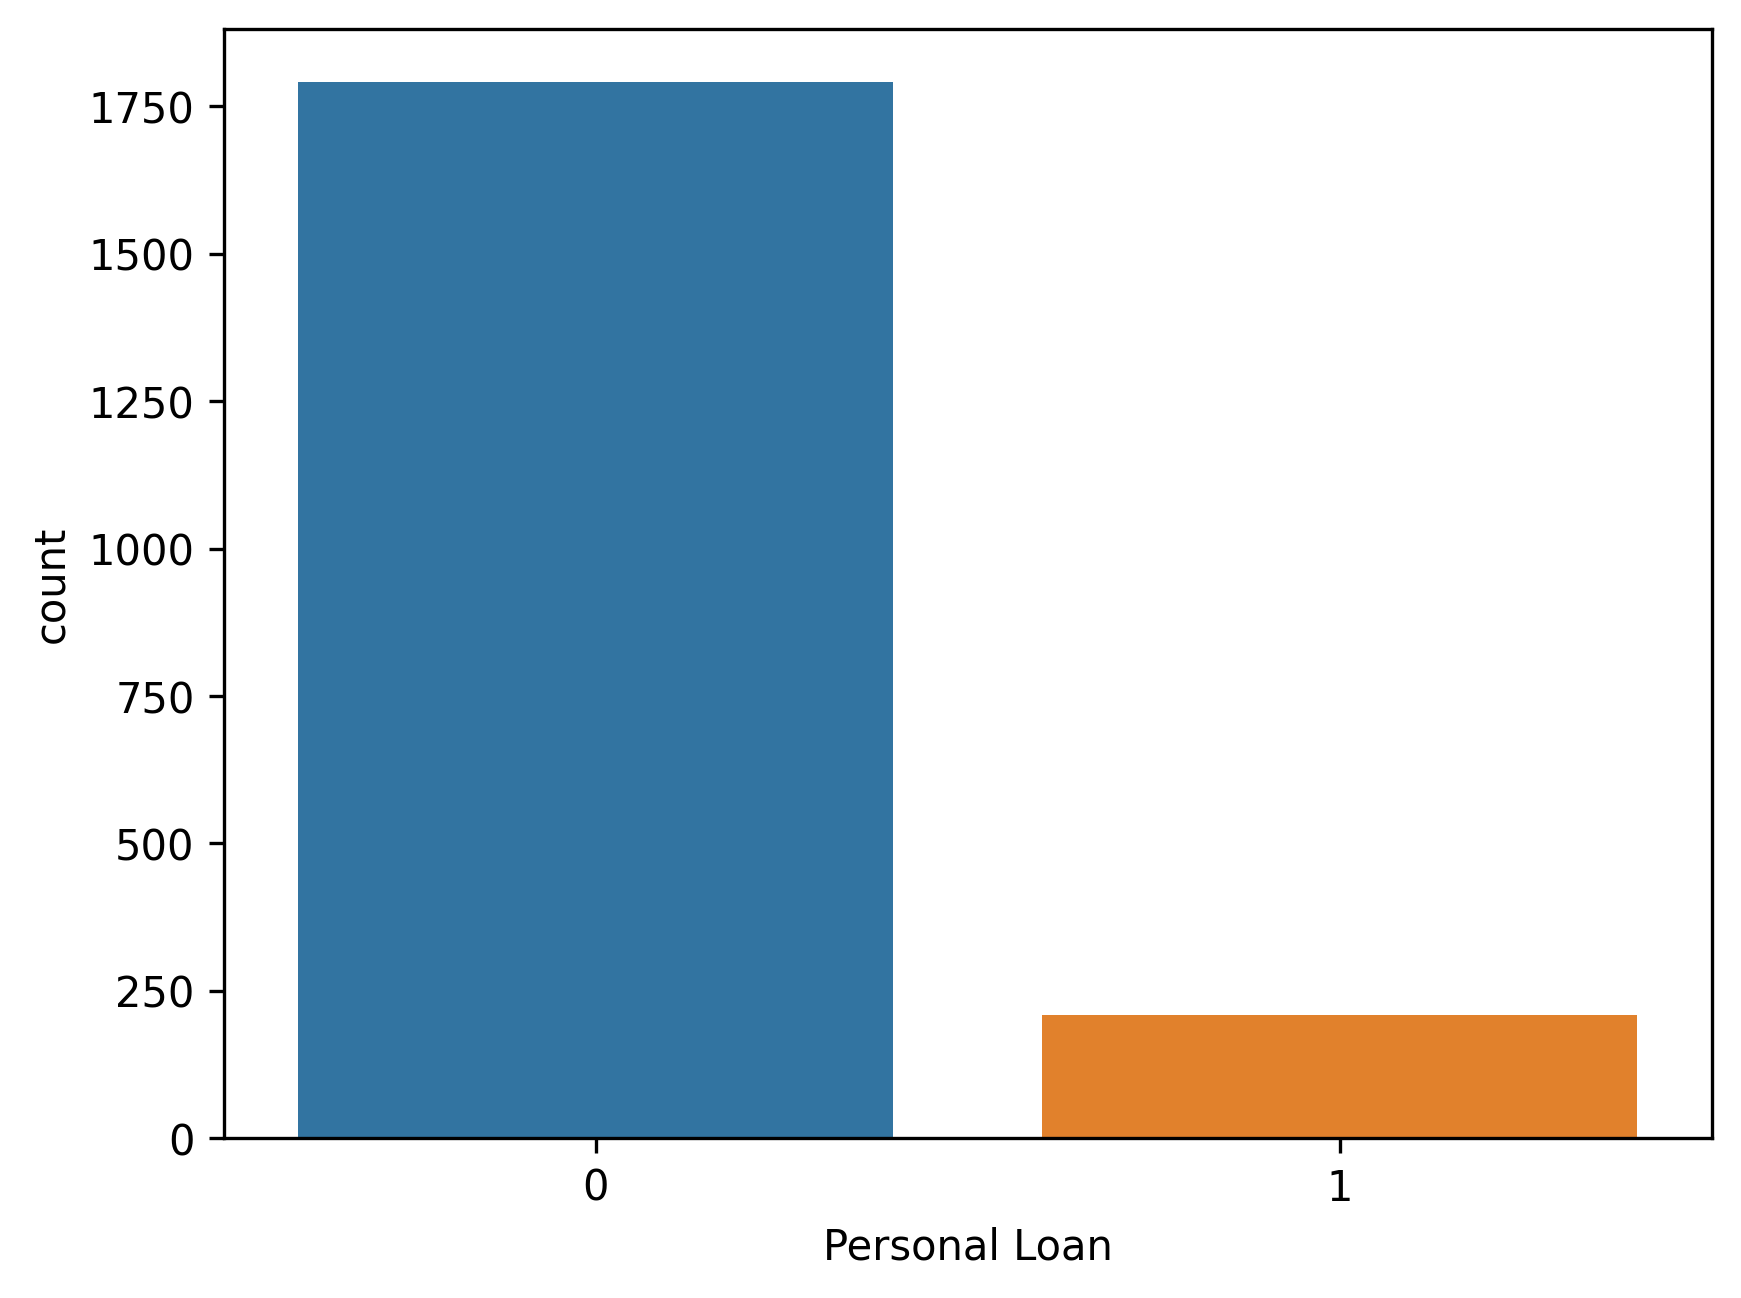

In [ ]:
# HeartDisease_Yes 컬럼 클래스 분포 시각화
sns.countplot(x="Personal Loan", data=y_train)

plt.show()

In [ ]:
# 학습셋 모델 학습

model = LogisticRegression()
model.fit(X_train, y_train)

print('학습셋 모델 정확도:', model.score(X_train, y_train))

학습셋 모델 정확도: 0.9405


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

# 테스트셋 모델 적합

print('테스트셋 모델 정확도:', model.score(X_test, y_test))

테스트셋 모델 정확도: 0.942


In [ ]:
# 다른 로지스틱 모델로 학습

model2 = sm.Logit(y_train,X_train)
results = model2.fit(method = "newton")

results.summary()

Optimization terminated successfully.
         Current function value: 0.165212
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1994
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                  0.5066
Time:                        01:27:27   Log-Likelihood:                -330.42
converged:                       True   LL-Null:                       -669.72
Covariance Type:            nonrobust   LLR p-value:                2.092e-144
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.4682      0.028    -16.622      0.000      -0.523      -0.413
Experience     0.4676      0.032     14.671      0.000       0.405       0.530
Income         0.0479      0.003     15.073      0.000       0.042       0.054
Family         0.5320      0.097      5.469      0.000       0.341       0.723
CCAvg          0.1209      0.051      2.355      0.019       0.020       0.222
Education      1.4930      0.150      9.964      0.000       1.199       1.787
==============================================================================
"""

In [ ]:
# 오즈비 확인

np.exp(results.params)

Age           0.626151
Experience    1.596177
Income        1.049053
Family        1.702338
CCAvg         1.128519
Education     4.450255
dtype: float64

#3. 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image
from sklearn.metrics import accuracy_score

In [ ]:
# 의사결정나무 모델 적용
# 모델 생성 및 학습
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth=2)
dt_model.fit(X_train,y_train)

# 테스트셋 예측
y_pred = dt_model.predict(X_test)

# 정확도 계산
accuracy_score(y_test, y_pred)

0.946

In [ ]:

# 독립변수 중요도 확인

dt_model.feature_importances_

pd.DataFrame({'feature' : X_train.columns,

              'importance' : dt_model.feature_importances_})

,feature,importance
0,Age,0.000000
1,Experience,0.000000
2,Income,0.624814
3,Family,0.000000
4,CCAvg,0.089818
5,Education,0.285368


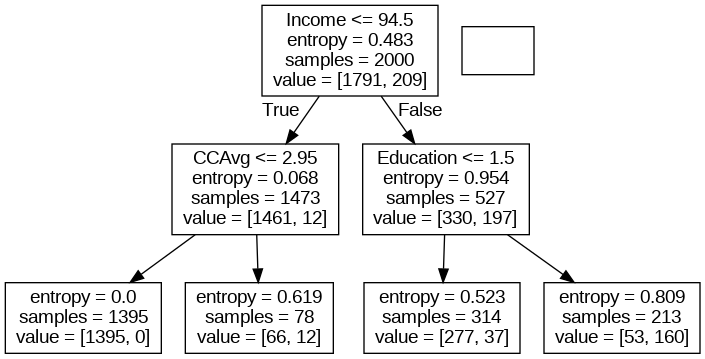

In [ ]:
# 의사결정나무 시각화

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

# 시각화 세부 옵션 설정
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X_train.columns
)

# 시각화
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [ ]:
# 의사결정나무 모델 적용
# 모델 생성 및 학습
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
dt_model.fit(X_train,y_train)

# 테스트셋 예측
y_pred = dt_model.predict(X_test)

# 정확도 계산
accuracy_score(y_test, y_pred)

0.982

In [ ]:

# 독립변수 중요도 확인

dt_model.feature_importances_

pd.DataFrame({'feature' : X_train.columns,

              'importance' : dt_model.feature_importances_})

,feature,importance
0,Age,0.000000
1,Experience,0.007170
2,Income,0.572546
3,Family,0.131712
4,CCAvg,0.102488
5,Education,0.186085


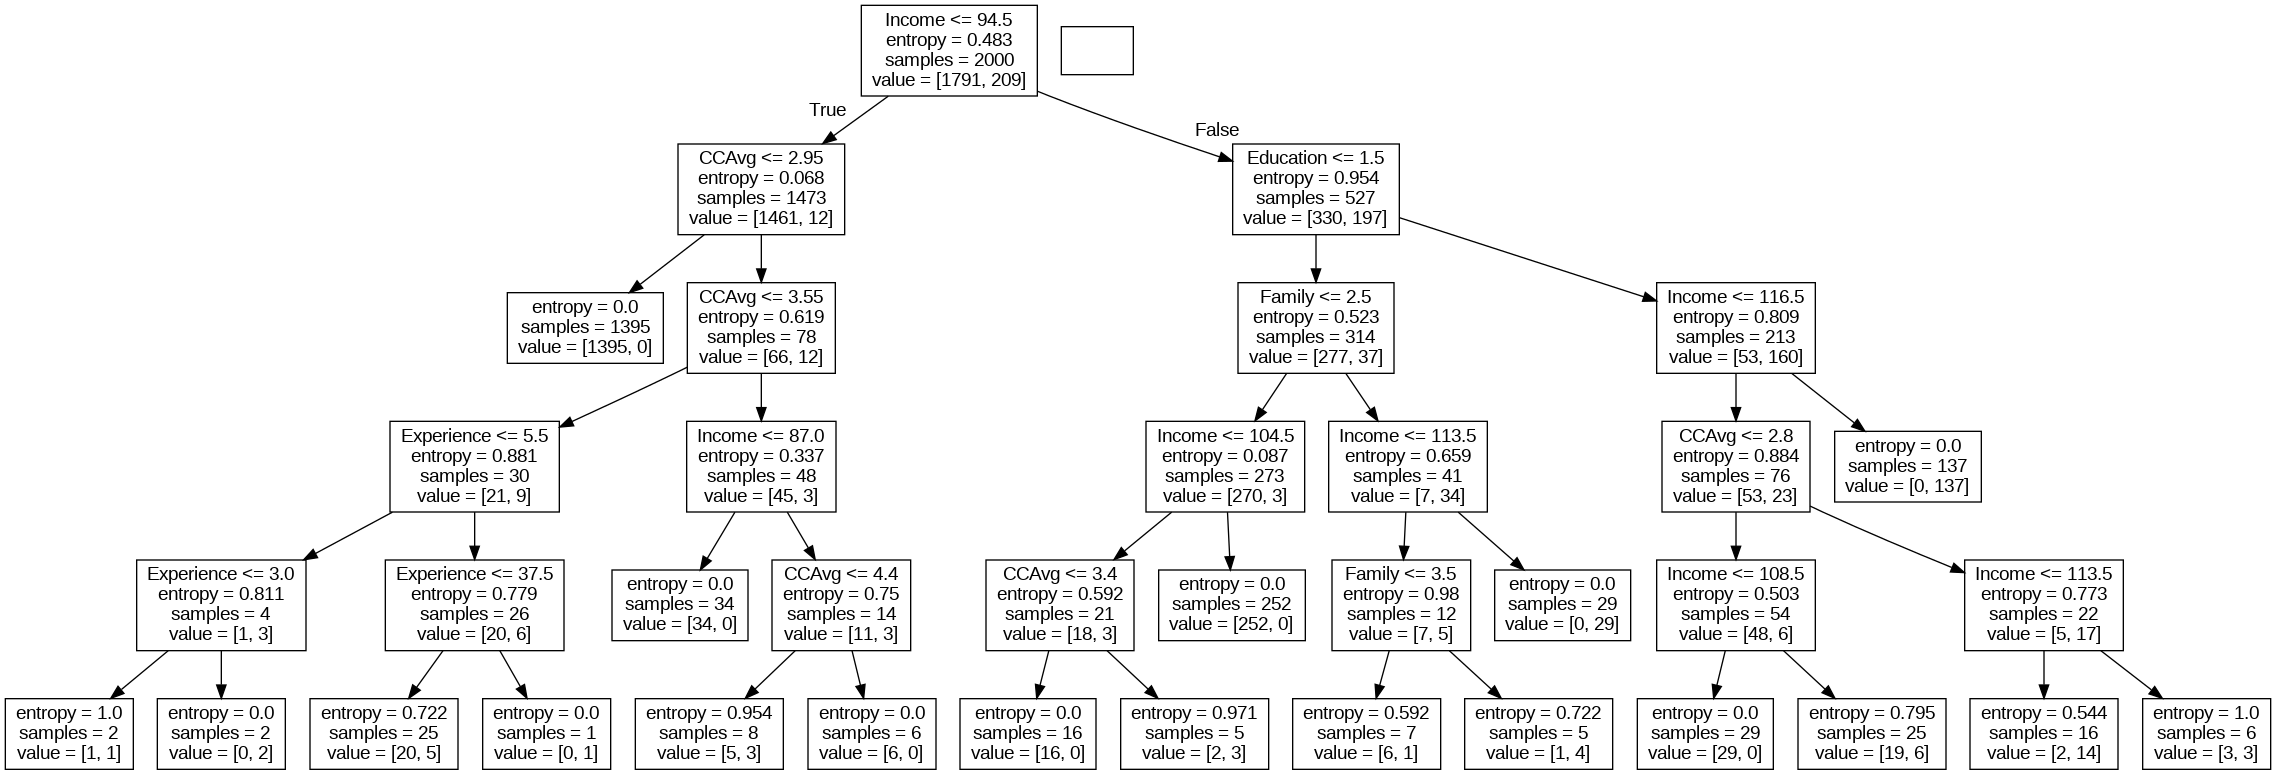

In [ ]:
# 의사결정나무 시각화

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

# 시각화 세부 옵션 설정
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X_train.columns
)

# 시각화
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())